In [1]:
import os
import sys
!{sys.executable} -m pip install opencv-python

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator

import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
train_path = './data/train'
test_path = './data/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(400,400), class_mode='categorical', batch_size=10, shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(400,400), class_mode='categorical', batch_size=10, shuffle=True)

imgs, labels = next(train_batches)

Found 2150 images belonging to 36 classes.
Found 360 images belonging to 36 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

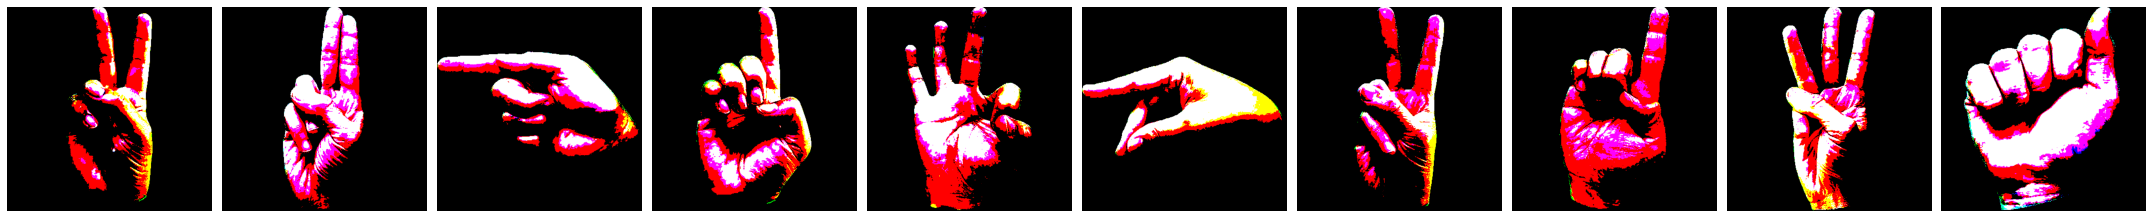

In [5]:
#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #ax.imshow(img.astype('uint8'))
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(400,400,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(36,activation ="softmax"))

In [7]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)

imgs, labels = next(train_batches) 
imgs, labels = next(test_batches) 
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.save('asl_model.h5')

Epoch 1/10
215/215 [==============================] - 239s 1s/step - loss: 10.6574 - accuracy: 0.4563 - val_loss: 0.5817 - val_accuracy: 0.8194 - lr: 0.0010
Epoch 2/10
215/215 [==============================] - 236s 1s/step - loss: 0.2908 - accuracy: 0.9126 - val_loss: 0.3895 - val_accuracy: 0.9056 - lr: 0.0010
Epoch 3/10
215/215 [==============================] - 236s 1s/step - loss: 0.1962 - accuracy: 0.9460 - val_loss: 0.5439 - val_accuracy: 0.8917 - lr: 0.0010
Epoch 4/10
215/215 [==============================] - 237s 1s/step - loss: 0.0693 - accuracy: 0.9837 - val_loss: 0.1606 - val_accuracy: 0.9611 - lr: 2.0000e-04
Epoch 5/10
215/215 [==============================] - 250s 1s/step - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.1636 - val_accuracy: 0.9611 - lr: 2.0000e-04
Epoch 6/10
215/215 [==============================] - 254s 1s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1679 - val_accuracy: 0.9611 - lr: 1.0000e-04
loss of 0.005254526622593403; accuracy of 100.0%


In [8]:
imgs, labels = next(test_batches)

model = keras.models.load_model(r"asl_model.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

loss of 0.0010557847563177347; accuracy of 100.0%
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 199, 199, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 97, 97, 128)       73856     
                                                                 
 max_p

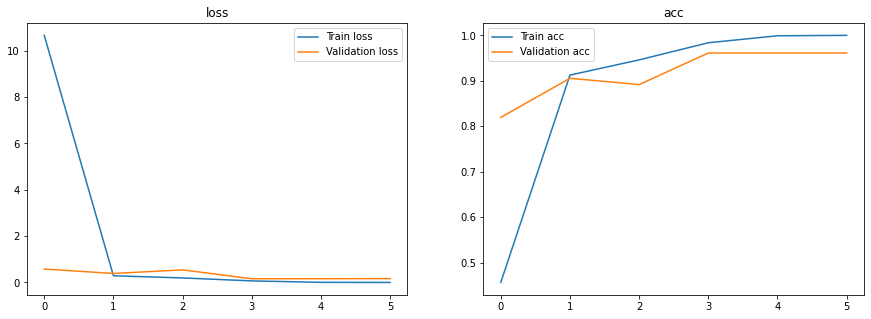

In [9]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()
show_final_history(history2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

predictions on a small set of test data
0   P   C   C   R   U   J   6   J   D   

Actual labels
0   P   C   C   R   U   J   6   J   D   

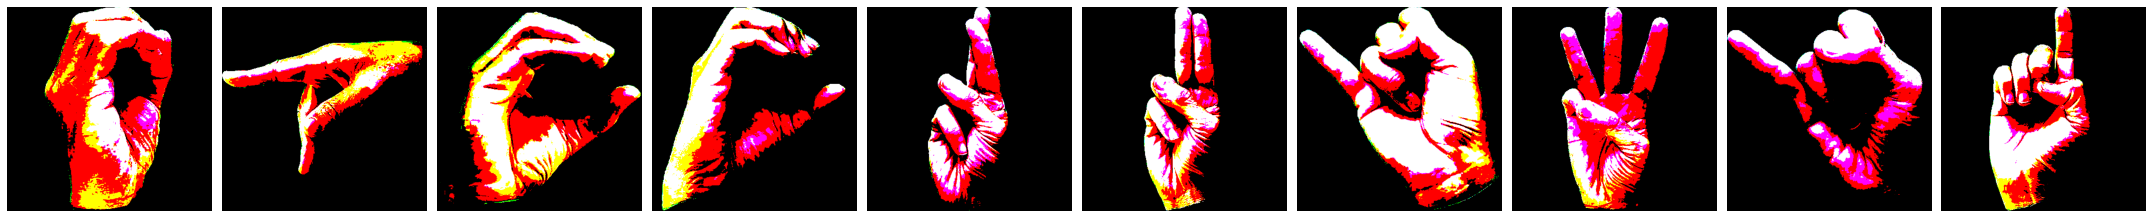

In [10]:
word_dict = {
    0:'0',
    1:'1',
    2:'2',
    3:'3',
    4:'4',
    5:'5',
    6:'6',
    7:'7',
    8:'8',
    9:'9',
    10:'A',
    11:'B',
    12:'C',
    13:'D',
    14:'E',
    15:'F',
    16:'G',
    17:'H',
    18:'I',
    19:'J',
    20:'K',
    21:'L',
    22:'M',
    23:'N',
    24:'O',
    25:'P',
    26:'Q',
    27:'R',
    28:'S',
    29:'T',
    30:'U',
    31:'V',
    32:'W',
    33:'X',
    34:'Y',
    35:'Z'
}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

print('\n\nActual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')
plotImages(imgs)
